# Bibliotecas

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import set_config
set_config(transform_output='pandas')

# 1. Ingestão dos dados

In [40]:
df = pd.read_csv('../data/bancario.csv')
df.head()

,Conta,Renda,Dívida,Classe
0,101,2800,550,bom
1,102,1300,500,mau
2,103,1400,80,bom
3,104,500,200,mau
4,105,1100,270,mau


# 2. Pré-processamento

In [41]:
# Separando o DataFrame em X e y
X = df[['Renda', 'Dívida']]
y = np.where(df['Classe'] == 'bom', -1, 1)
print(X.shape)
print(y.shape)

(21, 2)
(21,)


In [42]:
# Aplicando escalonamento em X
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df_proc = X.copy().assign(Classe=y)

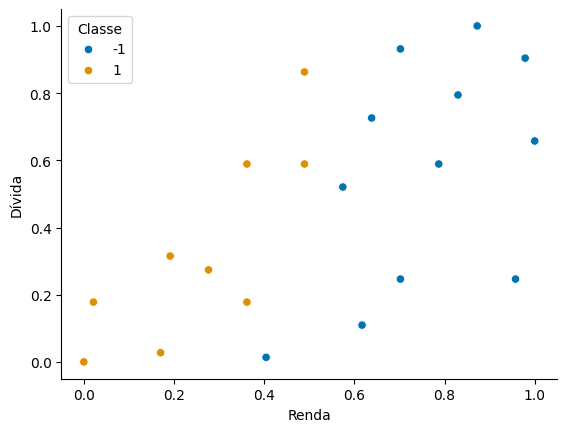

In [43]:
# Verificando se o problema é linearmente separável
sns.scatterplot(data=df_proc, x='Renda', y='Dívida', hue='Classe', palette='colorblind')
sns.despine();

In [44]:
# Separando o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(14, 2)
(14,)


# 3. Modelagem

In [46]:
# Declaração e treinamento do modelo perceptron
perceptron = Perceptron(alpha=.1, eta0=.0001, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.1, eta0=0.0001, random_state=42)

# 4. Avaliação

In [52]:
# Validação a partir dos dados de treino
y_pred_train = perceptron.predict(X_train)
acc_score_train = accuracy_score(y_pred_train, y_train)
print(f'Acurácia com dados de treinamento: {acc_score_train}')

# Validação a partir dos dados de teste, que não participaram do treinamento
y_pred_test = perceptron.predict(X_test)
acc_score_test = accuracy_score(y_pred_test, y_test)
print(f'Acurácia com dados de teste: {acc_score_test}')

# Mostra o classification report
print(f'\n{classification_report(y_pred_test, y_test)}')

print(f'Número de épocas no treinamento: {perceptron.n_iter_}')
print(f'Lista de parâmetros configurados na Perceptron: \n{perceptron.get_params()}')


Acurácia com dados de treinamento: 1.0
Acurácia com dados de teste: 0.8571428571428571

              precision    recall  f1-score   support

          -1       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

Número de épocas no treinamento: 6
Lista de parâmetros configurados na Perceptron: 
{'alpha': 0.1, 'class_weight': None, 'early_stopping': False, 'eta0': 0.0001, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


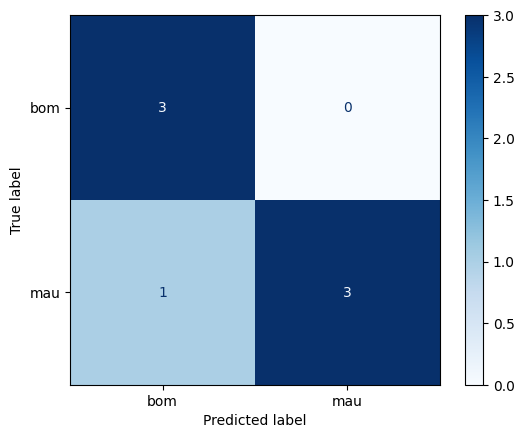

In [57]:
# Matriz de confusão
ConfusionMatrixDisplay.from_estimator(perceptron, X_test, y_test, cmap='Blues',
                                      display_labels = ['bom', 'mau']);